# Align timeseries with different sampling instances

Given are multiple time-series wherin each can have different times at which the signals is sampled (Asynchronous sampling of multiple signals). The goal is to align the samples to make the time-series compareable. Therefore, the common times are determined and a linear interpolation is used to compute missing samples. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def interpolate_to_common_sampling_instants(time_vector_list, value_vector_list):

    t_union = np.unique( np.concatenate(tuple(time_vector_list)) )
    v_out_list = [ np.interp(t_union, t, v) for t, v in zip(time_vector_list, value_vector_list)  ]

    return t_union, v_out_list


def interpolate_to_common_sampling_instants_pd(pdf, time_col = 't', value_col = 'v', id_col = 'id', output_format='in_columns'):
    
    ids = pdf[id_col].unique()
    
    time_vector_list  = [ ( pdf[pdf[id_col] == _id][time_col].to_numpy()  ) for _id in ids ]
    value_vector_list = [ ( pdf[pdf[id_col] == _id][value_col].to_numpy() ) for _id in ids ]

    t_union, v_out_list = interpolate_to_common_sampling_instants(time_vector_list, value_vector_list)

    if output_format == 'in_rows':
        ret_pdf = pd.concat(( 
            pd.DataFrame({ time_col : t_union, value_col : v_out, id_col: _id }) 
            for v_out, _id
            in zip(v_out_list, ids)
        ))
        
    elif output_format == 'in_columns':
        ret_pdf = pd.DataFrame(
                        { 
                            time_col : t_union
                        } | { 
                            _id : v_out
                            for v_out, _id
                            in zip(v_out_list, ids)
                        } 
                    )

    return ret_pdf


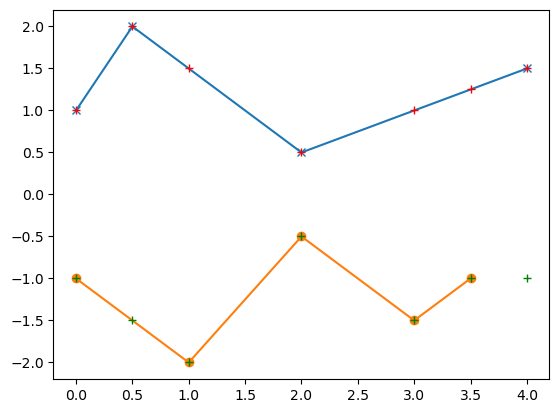

In [3]:
t1 = [0.0, 0.5, 2.0, 4.0] # time instances
v1 = [1.0, 2.0, 0.5, 1.5]
t2 = [0.0, 1.0, 2.0, 3.0, 3.5] # time instances (these are different to t1)
v2 = [-1.0, -2.0, -0.5, -1.5, -1]

time_vector_list = [t1, t2]
value_vector_list = [v1, v2]


t_union, v_out_list = interpolate_to_common_sampling_instants(time_vector_list, value_vector_list)

if True:
    plt.plot(t1, v1, '-x')
    plt.plot(t2, v2, '-o')
    plt.plot(t_union, v_out_list[0], 'r+')
    plt.plot(t_union, v_out_list[1], 'g+')
    plt.show()

In [4]:
pdf1 = pd.DataFrame({'t':t1, 'v':v1, 'id':1 })
pdf2 = pd.DataFrame({'t':t2, 'v':v2, 'id':3 })
pdf = pd.concat(( pdf1,pdf2 ))
pdf_ret = interpolate_to_common_sampling_instants_pd(pdf)

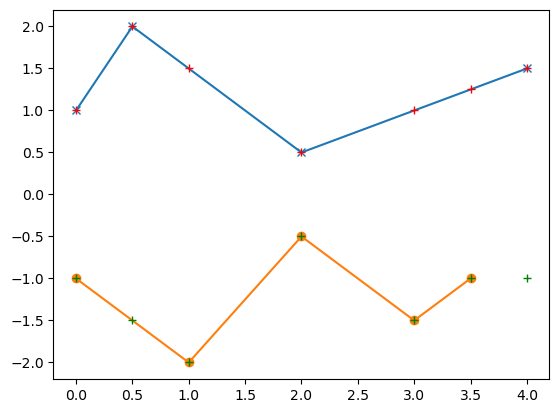

In [5]:
plt.plot(t1, v1, '-x')
plt.plot(t2, v2, '-o')
plt.plot(pdf_ret.t, pdf_ret[1], 'r+')
plt.plot(pdf_ret.t, pdf_ret[3], 'g+')
plt.show()